<a href="https://colab.research.google.com/github/e-junior/PosTech-Phasis-2/blob/main/indice_ibov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Tratamento dos dados

In [33]:
df_ibov = pd.read_csv('ibov_index.csv')

In [34]:
df_ibov.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,28.08.2025,141.640,139.206,142.138,139.206,"5,84M","1,75%"
1,27.08.2025,139.206,137.773,139.281,137.456,"6,61B","1,04%"
2,26.08.2025,137.771,138.026,138.037,137.058,"8,45B","-0,18%"
3,25.08.2025,138.025,137.971,138.890,137.971,"5,99B","0,04%"
4,22.08.2025,137.968,134.511,138.072,134.511,"9,32B","2,57%"


In [35]:
df_ibov.tail()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
659,06.01.2023,108.964,107.642,109.433,107.642,"12,63M","1,23%"
660,05.01.2023,107.641,105.336,107.743,105.333,"15,51M","2,19%"
661,04.01.2023,105.334,104.167,105.627,103.915,"14,45M","1,12%"
662,03.01.2023,104.166,106.377,106.684,103.852,"14,47M","-2,08%"
663,02.01.2023,106.376,109.734,109.734,105.981,"8,13M","-3,06%"


In [36]:
df_ibov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      664 non-null    object 
 1   Último    664 non-null    float64
 2   Abertura  664 non-null    float64
 3   Máxima    664 non-null    float64
 4   Mínima    664 non-null    float64
 5   Vol.      664 non-null    object 
 6   Var%      664 non-null    object 
dtypes: float64(4), object(3)
memory usage: 36.4+ KB


In [37]:
# renomeando colunas

df_ibov.rename(columns={'Data':'data', 'Último': 'ultimo', 'Abertura' : 'abertura', 'Máxima': 'maxima', 'Mínima' : 'minima', 'Vol.': 'vol', 'Var%': 'variacao'}, inplace=True)

In [38]:
# convertendo coluna data em objeto para datetime

df_ibov['data'] = pd.to_datetime(df_ibov['data'], dayfirst=True, errors='coerce')

#ainda nao sei se consigo fazer operações de data com esse formato

In [39]:
#convertendo valores de coluna vol para float

def convert_volume(vol_str):
    vol_str = vol_str.replace(',', '.')
    if 'M' in vol_str:
        return float(vol_str.replace('M', '')) * 1_000_000
    elif 'B' in vol_str:
        return float(vol_str.replace('B', '')) * 1_000_000_000
    else:
        return float(vol_str)

df_ibov['vol'] = df_ibov['vol'].apply(convert_volume)

In [40]:
#convertendo valores de coluna variacao para float centesimal

def convert_variacao(variacao_str):
    variacao_str = variacao_str.replace(',', '.')
    if '%' in variacao_str:
        return float(variacao_str.replace('%', '')) / 100
    else:
        return float(variacao_str) / 100

df_ibov['variacao'] = df_ibov['variacao'].apply(convert_variacao)

In [41]:
def convert_system (df_ibov, lista_colunas):
  for coluna in lista_colunas:
   df_ibov[coluna] = df_ibov[coluna]*1000
  return df_ibov


In [42]:
convert_system(df_ibov, ('abertura', 'maxima', 'minima', 'ultimo'))

,data,ultimo,abertura,maxima,minima,vol,variacao
0,2025-08-28,141640.0,139206.0,142138.0,139206.0,5.840000e+06,0.0175
1,2025-08-27,139206.0,137773.0,139281.0,137456.0,6.610000e+09,0.0104
2,2025-08-26,137771.0,138026.0,138037.0,137058.0,8.450000e+09,-0.0018
3,2025-08-25,138025.0,137971.0,138890.0,137971.0,5.990000e+09,0.0004
4,2025-08-22,137968.0,134511.0,138072.0,134511.0,9.320000e+09,0.0257
...,...,...,...,...,...,...,...
659,2023-01-06,108964.0,107642.0,109433.0,107642.0,1.263000e+07,0.0123
660,2023-01-05,107641.0,105336.0,107743.0,105333.0,1.551000e+07,0.0219
661,2023-01-04,105334.0,104167.0,105627.0,103915.0,1.445000e+07,0.0112
662,2023-01-03,104166.0,106377.0,106684.0,103852.0,1.447000e+07,-0.0208


In [43]:
#criando coluna de diferença absoluta entre abertura e fechamento diário (delta)
df_ibov['delta'] = df_ibov['abertura'] - df_ibov['ultimo']

#EDA simples

In [44]:
df_ibov.describe()

,data,ultimo,abertura,maxima,minima,vol,variacao,delta
count,664,664.000000,664.000000,664.000000,664.000000,6.640000e+02,664.000000,664.000000
mean,2024-04-30 13:18:04.337349376,123868.281627,123820.480422,124666.582831,123051.314759,2.369256e+09,0.000431,-47.801205
min,2023-01-02 00:00:00,97926.000000,97926.000000,99258.000000,96997.000000,4.330000e+06,-0.031500,-4365.000000
25%,2023-08-29 18:00:00,117881.250000,117858.500000,118611.250000,117043.250000,9.370000e+06,-0.005400,-792.500000
50%,2024-05-02 12:00:00,126151.500000,126139.000000,127181.000000,125592.000000,1.157000e+07,0.000200,-17.500000
75%,2024-12-27 18:00:00,130811.500000,130801.250000,131541.500000,130103.750000,1.918750e+07,0.006400,653.500000
max,2025-08-28 00:00:00,141640.000000,141265.000000,142138.000000,140597.000000,2.487000e+10,0.042900,3927.000000
std,NaN,9779.280386,9770.133634,9713.798274,9814.459515,4.370537e+09,0.009692,1174.023995


In [45]:
# lineplot, boxplots, scatterplots, algumas correlações e leituras a fazer...

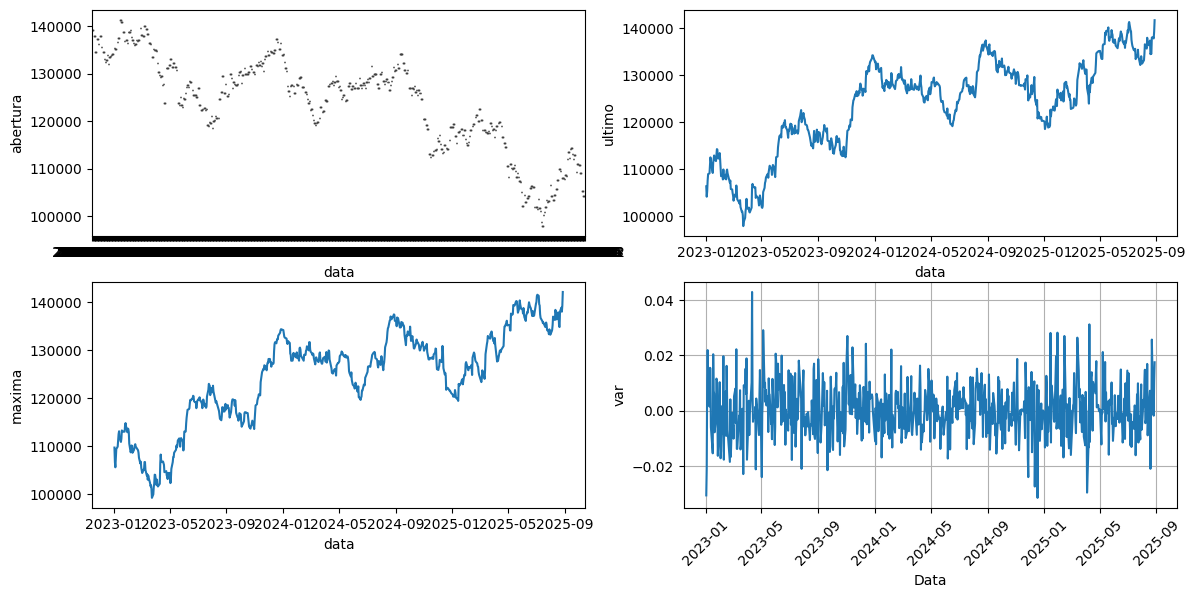

In [46]:
plt.figure(figsize=(14,10))
plt.subplot(3,2,1)
sns.boxplot(data=df_ibov, x='data', y='abertura')
plt.subplot(3,2,2)
sns.lineplot(data=df_ibov, x='data', y='ultimo')
plt.subplot(3,2,3)
sns.lineplot(data=df_ibov, x='data', y='maxima')
plt.subplot(3,2,4)
sns.lineplot(data=df_ibov, x='data', y='variacao')
plt.grid()
plt.title('')
plt.xlabel('Data')
plt.xticks(rotation=45)
plt.ylabel('var')
plt.show()

In [47]:
# variavel delta (diferenca entre abertura e fechamento do dia anterior)

df_ibov['delta'] = df_ibov['abertura'] - df_ibov['ultimo']


#trazendo matriz de correlação

correlações aparentes se encontram entre as variaveis minima, maxima, abertura e fechamento(ultimo)

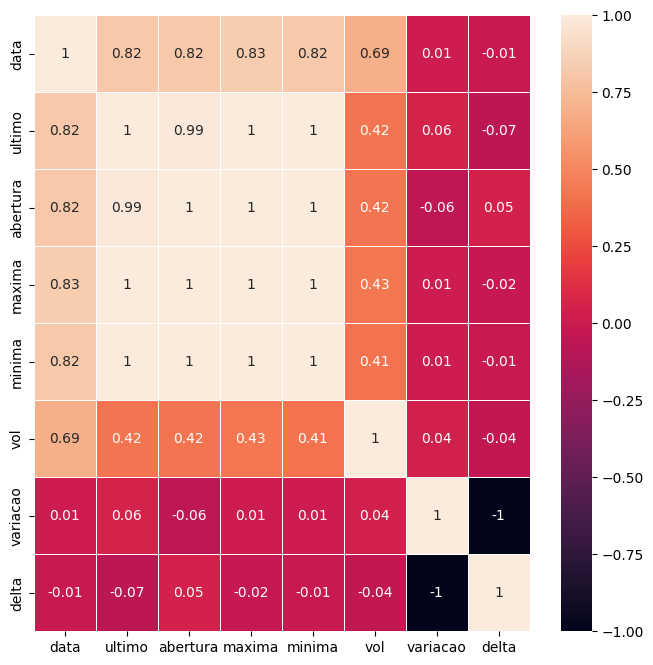

In [48]:

correlation_matrix = df_ibov.corr().round(2)

fig, ax= plt.subplots(figsize=(8,8))

sns.heatmap(correlation_matrix, annot=True, linewidths=.5, ax=ax)

plt.show()


In [49]:
df_ibov.head(200)

,data,ultimo,abertura,maxima,minima,vol,variacao,delta
0,2025-08-28,141640.0,139206.0,142138.0,139206.0,5.840000e+06,0.0175,-2434.0
1,2025-08-27,139206.0,137773.0,139281.0,137456.0,6.610000e+09,0.0104,-1433.0
2,2025-08-26,137771.0,138026.0,138037.0,137058.0,8.450000e+09,-0.0018,255.0
3,2025-08-25,138025.0,137971.0,138890.0,137971.0,5.990000e+09,0.0004,-54.0
4,2025-08-22,137968.0,134511.0,138072.0,134511.0,9.320000e+09,0.0257,-3457.0
...,...,...,...,...,...,...,...,...
195,2024-11-12,127698.0,127873.0,128210.0,127411.0,9.520000e+06,-0.0014,175.0
196,2024-11-11,127874.0,127829.0,128095.0,127306.0,8.400000e+06,0.0003,-45.0
197,2024-11-08,127830.0,129647.0,129647.0,126973.0,1.318000e+07,-0.0143,1817.0
198,2024-11-07,129682.0,130341.0,131319.0,129406.0,1.052000e+07,-0.0051,659.0


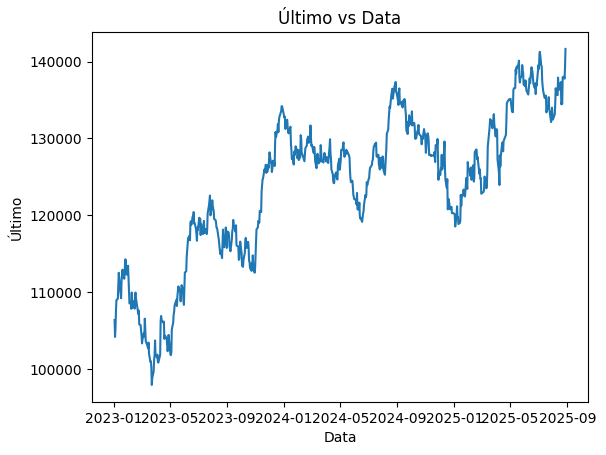

In [50]:
plt.plot(df_ibov['data'], df_ibov['ultimo'])
plt.xlabel('Data')
plt.ylabel('Último')
plt.title('Último vs Data')
plt.show()

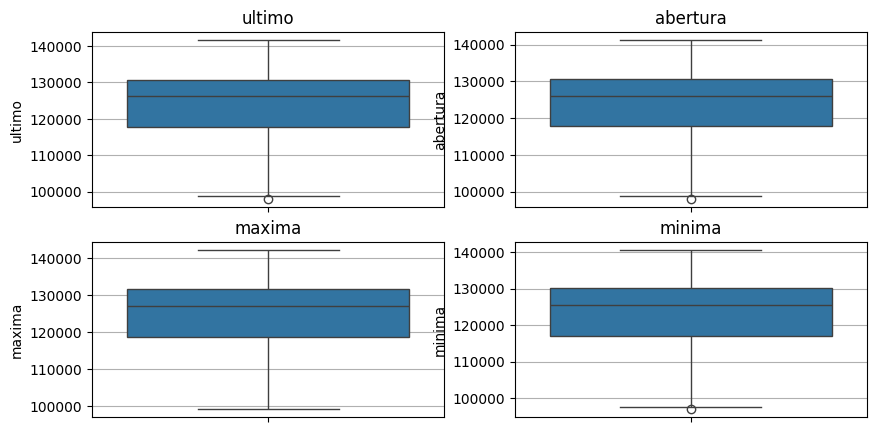

In [51]:
#boxplot para variaveis que apresentam correlação

plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
plt.grid()
sns.boxplot(df_ibov['ultimo'])
plt.title('ultimo')
plt.subplot(2,2,2)
plt.grid()
sns.boxplot(df_ibov['abertura'])
plt.title('abertura')
plt.subplot(2,2,3)
plt.grid()
sns.boxplot(df_ibov['maxima'])
plt.title('maxima')
plt.subplot(2,2,4)
plt.grid()
sns.boxplot(df_ibov['minima'])
plt.title('minima')

plt.show()

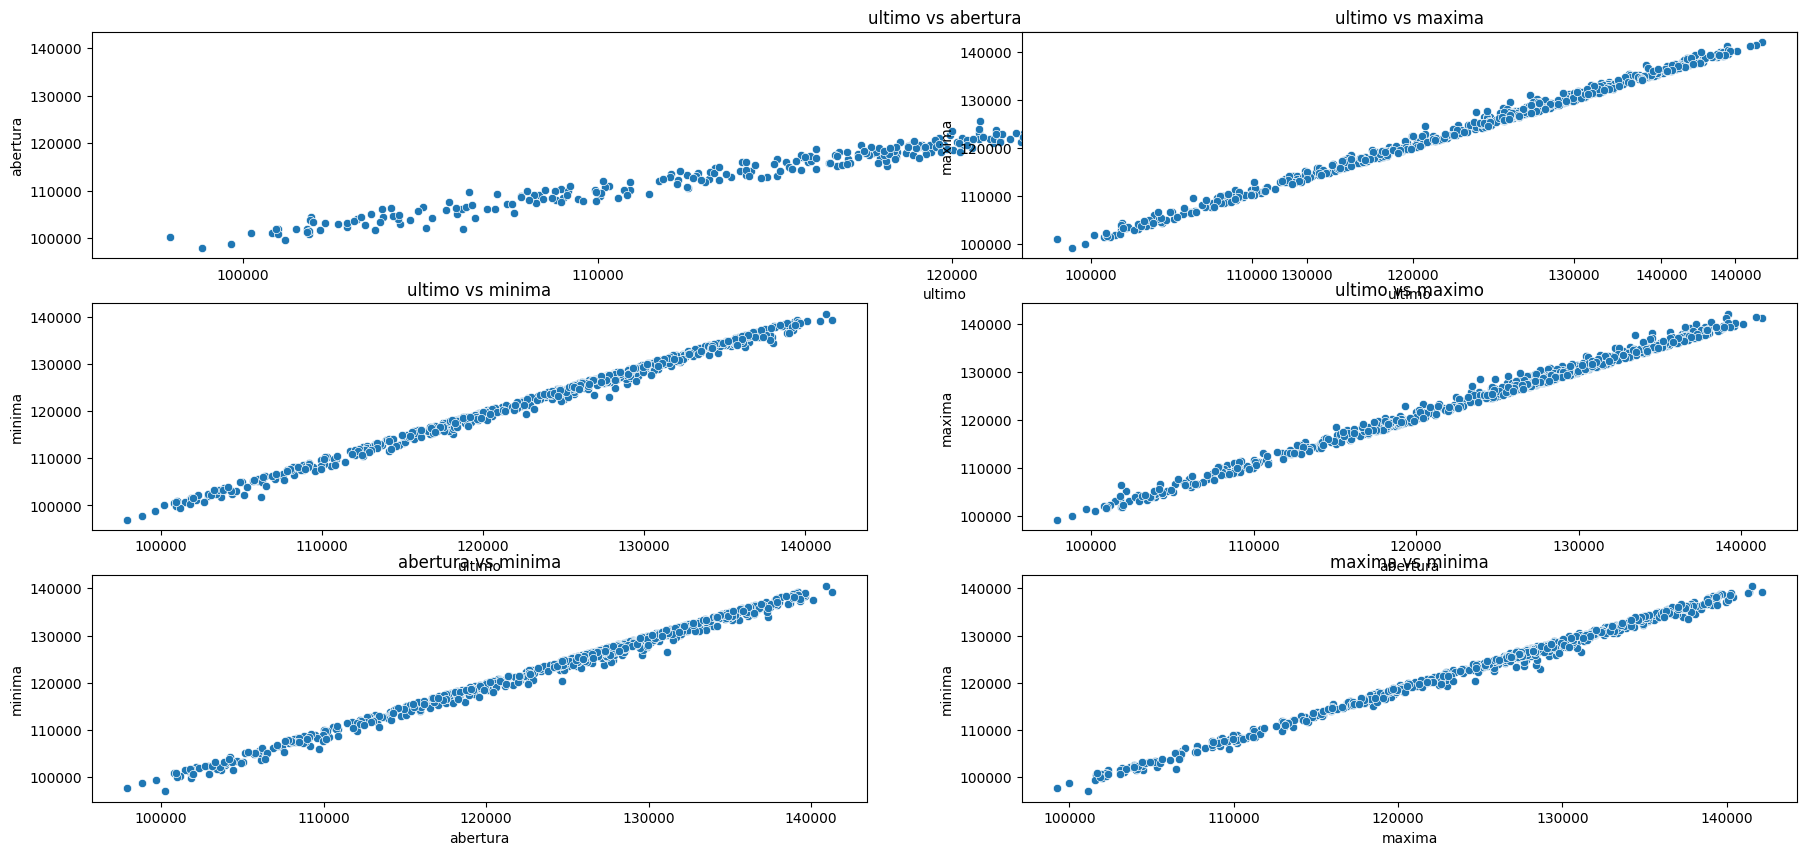

In [52]:
# scatterplot
plt.figure(figsize=(22,10))
plt.subplot(3,1,1)
sns.scatterplot(data=df_ibov,  x='ultimo', y='abertura')
plt.title('ultimo vs abertura')
plt.subplot(3,2,2)
sns.scatterplot(data=df_ibov,  x='ultimo', y='maxima')
plt.title('ultimo vs maxima')
plt.subplot(3,2,3)
sns.scatterplot(data=df_ibov,  x='ultimo', y='minima')
plt.title('ultimo vs minima')
plt.subplot(3,2,4)
sns.scatterplot(data=df_ibov,  x='abertura', y='maxima')
plt.title('ultimo vs maximo')
plt.subplot(3,2,5)
sns.scatterplot(data=df_ibov,  x='abertura', y='minima')
plt.title('abertura vs minima')
plt.subplot(3,2,6)
sns.scatterplot(data=df_ibov,  x='maxima', y='minima')
plt.title('maxima vs minima')


plt.show()